# **CLUSTERING**

# **Data preprocessing**




**Import the libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder ,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


**Loading the dataset**

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/Live.csv")  # Replace "your_dataset.csv" with the path to your dataset file



**Displaying the rows of the dataset to understand its structure**

In [ ]:
# Display the first few rows of the dataset to understand its structure
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

(                          status_id status_type status_published  \
 0  246675545449582_1649696485147474       video   4/22/2018 6:00   
 1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
 2  246675545449582_1648730588577397       video   4/21/2018 6:17   
 3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
 4  246675545449582_1645700502213739       photo   4/18/2018 3:22   
 
    num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
 0            529           512         262        432         92         3   
 1            150             0           0        150          0         0   
 2            227           236          57        204         21         1   
 3            111             0           0        111          0         0   
 4            213             0           0        204          9         0   
 
    num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
 0          1         1           

**Handling of missing values**

**Column1 , Column2 , Column3 , Column4 are completely null . Remove those columns**

In [ ]:
# Remove completely null columns
df_cleaned = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])


**Checking for columns with unique values for every instance and dropping them**

In [ ]:

# Check for columns with unique values for every instance
cols_to_drop = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == len(df_cleaned)]

# Drop identified columns
df_cleaned = df_cleaned.drop(columns=cols_to_drop)

There are no columns with unique values for every instance

**Converting the categorical column status_published to numerical column**

In [ ]:
# Convert 'status_published' to datetime, then to Unix timestamp
df_cleaned['status_published'] = pd.to_datetime(df_cleaned['status_published'])
df_cleaned['status_published'] = df_cleaned['status_published'].astype('int64') // 10**9

**Transformation**

In [ ]:

# Define columns for transformation
categorical_cols = ['status_type']
numerical_cols = [col for col in df_cleaned.columns if col not in categorical_cols + ['status_published']]
numerical_cols += ['status_published']  # Add 'status_published' as a numerical column after conversion

**One hot encoding for categorical columns**

**Feature scaling (using min max scaler) for numerical columns**

In [ ]:
# Define the preprocessing for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(feature_range=(-1, 1)), numerical_cols),  # Scale to range -1 to 1
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [ ]:
# Apply the transformations
df_preprocessed = preprocessor.fit_transform(df_cleaned)

# Get the feature names for one-hot encoded columns
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine original numerical column names and one-hot encoded column names
all_feature_names = numerical_cols + list(ohe_feature_names)

In [ ]:
# Convert the preprocessed data back to a dataframe with all feature names
df_preprocessed_with_names = pd.DataFrame(df_preprocessed, columns=all_feature_names)


**Saving the preprocessed dataset to a new csv file**

In [ ]:
# Save the dataframe with correct column names to a new CSV file
corrected_file_path = '/content/drive/MyDrive/Datasets/Live_preprocessed_corrected.csv'
df_preprocessed_with_names.to_csv(corrected_file_path, index=False)

# **K MEANS CLUSTERING**

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct clusters. It starts by randomly selecting K initial centroids and iteratively assigns data points to the nearest centroid, updating the centroids' positions based on the mean of the data points in each cluster. This process repeats until convergence, resulting in clusters where data points within the same cluster are similar to each other and dissimilar to data points in other clusters. K-means aims to minimize the within-cluster sum of squares (WCSS) and is computationally efficient for large datasets. However, it has limitations such as sensitivity to initial centroid selection and assumptions about cluster shape and size. Preprocessing data and choosing the optimal number of clusters are crucial for obtaining meaningful clustering results.

**Importing the necessary libraries and loading the dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df_preprocessed = pd.read_csv("/content/drive/MyDrive/Datasets/Live_preprocessed_corrected.csv")



1.   **Using all features for clustering**
2.  **Elbow Method**: The Elbow Method is a heuristic used to find the optimal number of clusters in a dataset. It works by plotting the within-cluster sum of squares (WCSS) against the number of clusters. WCSS represents the sum of squared distances between each data point and its nearest cluster centroid. The idea is to find the point on the plot where the rate of decrease in WCSS slows down, forming an "elbow" shape. This point indicates the optimal number of clusters.
3.   **Loop over number of clusters**
4.   **Fitting the model and computing WCSS**: For each iteration, the KMeans model is fitted to the data, and the WCSS value is computed using the inertia_ attribute, which represents the sum of squared distances within each cluster
5.   **Plotting the results**: Finally, the code plots the number of clusters (x-axis) against the WCSS values (y-axis) using Matplotlib. This plot helps visualize the "elbow" point, where the rate of decrease in WCSS slows down, indicating the optimal number of clusters.













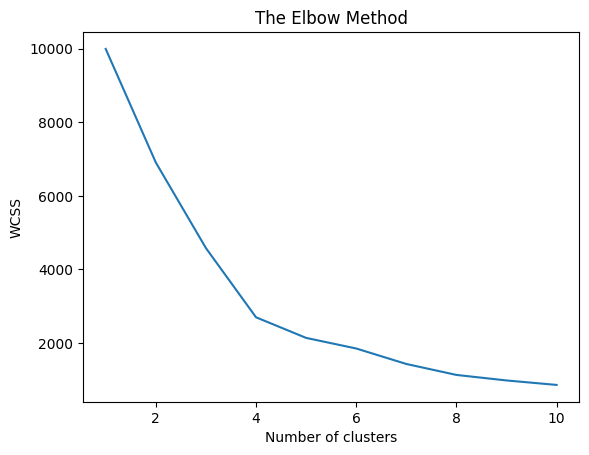

In [ ]:
# Using all features for clustering
X = df_preprocessed.values

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Explicitly setting n_init
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Inference about the elbow method graph :** the graph, the 'elbow' appears to be at the point where the line starts to flatten out. It looks like the most significant bend occurs at **k = 3.** After this point, the decrease in WCSS becomes more gradual, indicating that additional clusters are providing diminishing returns in terms of WCSS reduction.

Therefore, based on this Elbow Method graph, the optimal number of clusters for your dataset appears to be 3.

It applies K-means clustering with the optimal number of clusters (assumed to be 3 based on the Elbow Method) to the dataset. It visualizes the clusters in a 2D plot, where each cluster is represented by a different color. The centroids of the clusters are also plotted. This visualization helps in understanding the distribution of Facebook posts based on the number of reactions and comments they received.

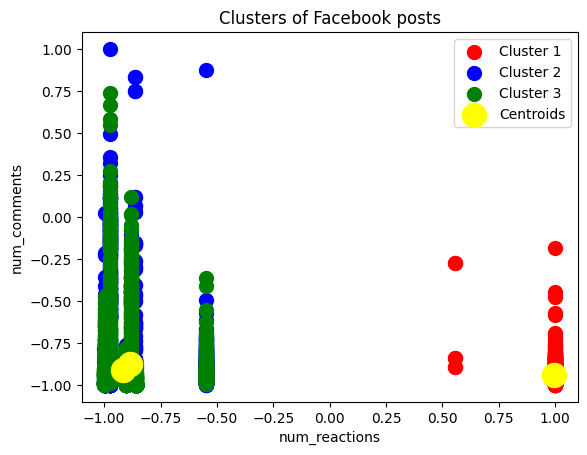

In [ ]:
# Applying K-means with the optimal number of clusters
optimal_k = 3  # Assuming you choose the number of clusters based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42,n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters (for 2D data)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
# Add more colors for additional clusters if needed

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Facebook posts')
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.legend()
plt.show()

**Inference on clusters for Facebook posts**

The scatter plot visualizes the clustering of Facebook posts based on scaled metrics for reactions and comments. Three clusters indicate varying levels of engagement:

**High-Reaction, Low-Comment Cluster:** Contains posts that are highly reacted to but not heavily commented on, potentially viral content.
**Moderate Engagement Cluster:** Features posts with a balanced number of reactions and comments, likely representing standard content.
**Low Engagement Cluster:** Consists of posts with few reactions and comments, indicating less user interaction.

Centroids highlight the average engagement for each cluster, and the tight grouping in Cluster 2 suggests uniform engagement, whereas the spread in Cluster 3 indicates variability. Some posts with particularly high engagement appear as potential outliers, indicating exceptionally high user interaction. This clustering can inform content strategy by highlighting how posts resonate with the audience.

**Calculating the majority status type for each cluster**

In [ ]:
# Group by cluster and calculate majority status_type for each cluster
cluster_majority_status = df_preprocessed.groupby('cluster').agg(lambda x: x.mode().iloc[0])

# Print the majority status_type for each cluster
print("Majority status_type for each cluster:")
print(cluster_majority_status[['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']])



Majority status_type for each cluster:
         status_type_link  status_type_photo  status_type_status  \
cluster                                                            
0                     0.0                1.0                 0.0   
1                     0.0                1.0                 0.0   
2                     0.0                0.0                 0.0   

         status_type_video  
cluster                     
0                      0.0  
1                      0.0  
2                      1.0  



*   **For Cluster 0, the majority status_type is 'photo'.**
*   **For Cluster 1, the majority status_type is 'photo'.**
*   **For Cluster 2, the majority status_type is 'video'.**






# **Hierrarchial clustering**

**Hierarchical clustering** is a technique for grouping data points into a hierarchical structure, providing insights into their intrinsic relationships. It operates by iteratively merging clusters based on their proximity, resulting in a dendrogram visualization. This method doesn't require specifying the number of clusters beforehand and is beneficial for revealing hierarchical structures within the data. However, it can be computationally intensive and sensitive to noise. Common applications include biological taxonomy, customer segmentation, document clustering, and image segmentation

**Importing the necessary libraries**

**Loading the preprocessed dataset**

**Using all the features for clustering**

**Creating a dendrogram to determine the optimal number of clusters**

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load the preprocessed data
df_preprocessed = pd.read_csv("/content/drive/MyDrive/Datasets/Live_preprocessed_corrected.csv")

# Using all features for clustering
X = df_preprocessed.values

# Create a dendrogram to determine the optimal number of clusters
Z = linkage(X, method='ward')  # Using Ward's method for linkage

**Plot the dendrogram:**

The dendrogram is a graphical representation used in hierarchical clustering to illustrate the arrangement of clusters and their distances. It displays vertical lines representing data points or clusters, with horizontal lines indicating merges between clusters. Branches connect clusters at various levels of the hierarchy, with branch lengths reflecting distances between clusters. Cutting the dendrogram at different heights allows for the formation of different numbers of clusters, providing flexibility in clustering granularity. Overall, dendrograms offer insights into the hierarchical structure of the data and aid in choosing an appropriate number of clusters for analysis.

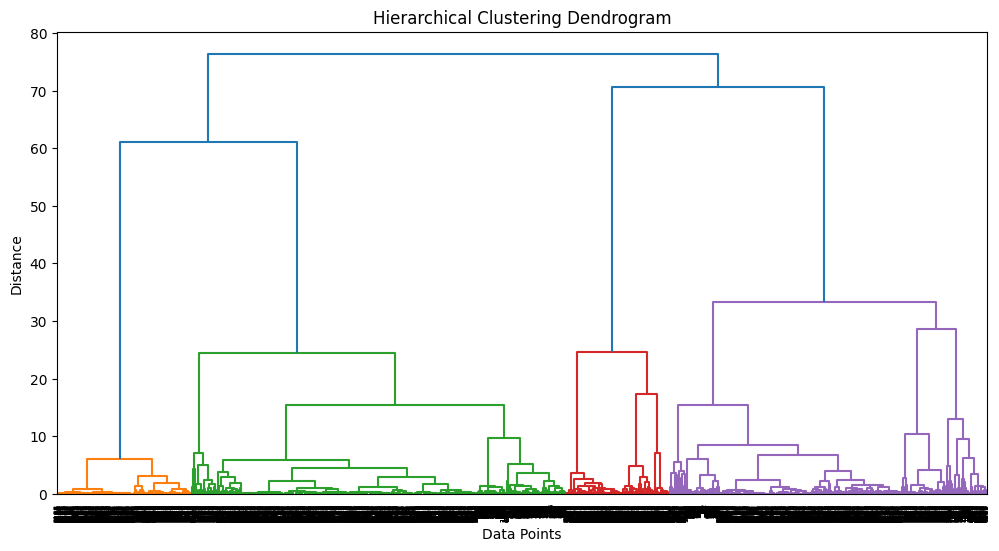

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

**Inference:**

From the visual inspection of the dendrogram, it looks like drawing a horizontal line at a distance of about 50 will cut through several vertical lines, possibly suggesting around 2 to 4 clusters as optimal, based on the visible gaps.

**Performing hierrarchial clustering with optimal no of clusters**

**Calculating the majority status_type for each cluster**

In [ ]:
optimal_clusters = 3

# Perform hierarchical clustering with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
cluster_labels = agg_clustering.fit_predict(X)

In [ ]:
 #Add cluster labels to the DataFrame
df_preprocessed['agg_cluster'] = cluster_labels

# Calculate the majority status_type for each cluster
agg_cluster_majority_status = df_preprocessed.groupby('agg_cluster').agg(lambda x: x.mode().iloc[0])


In [ ]:
# Print the majority status_type for each cluster
print("Majority status_type for each hierarchical cluster:")
print(agg_cluster_majority_status[['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']])

Majority status_type for each hierarchical cluster:
             status_type_link  status_type_photo  status_type_status  \
agg_cluster                                                            
0                         0.0                1.0                 0.0   
1                         0.0                0.0                 0.0   
2                         0.0                1.0                 0.0   

             status_type_video  
agg_cluster                     
0                          0.0  
1                          1.0  
2                          0.0  


Based on the majority status_type for each hierarchical cluster:


*   **For Cluster 0, the majority status_type is 'photo'.**
*   **For Cluster 1, the majority status_type is 'video'.**
*   **For Cluster 2, the majority status_type is 'photo'.**

This means that the majority of Facebook Live posts in Cluster 0 and Cluster 2 are of type 'photo', while the majority of posts in Cluster 1 are of type 'video'.